In [1]:
%pylab inline
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [203]:
rs = np.random.RandomState(2)

s1_df = pd.DataFrame()
s1_df['name'] = ['Gustav', 'Nat', 'Lingwei', 'Mitsue', 'Christine']
s1_df['year'] = rs.randint(1, 3, size=len(s1_df))

s2_df = pd.DataFrame()
s2_df['name'] = ['Alice', 'Bob']
s2_df['year'] = [1, 3]

In [204]:
s1_df

,name,year
0,Gustav,1
1,Nat,2
2,Lingwei,2
3,Mitsue,1
4,Christine,1


In [205]:
s2_df

,name,year
0,Alice,1
1,Bob,3


In [209]:
students_df = pd.concat([s1_df, s2_df], ignore_index=True)

In [210]:
gpa_df = pd.DataFrame()
gpa_df['name'] = ['Gustav', 'Lingwei', 'Nat', 'Joshua']
gpa_df['gpa'] = [4.0, 3.0, 2.0, 3.5]

In [211]:
gpa_df

,name,gpa
0,Gustav,4.0
1,Lingwei,3.0
2,Nat,2.0
3,Joshua,3.5


In [213]:
students_df.T

,0,1,2,3,4,5,6
name,Gustav,Nat,Lingwei,Mitsue,Christine,Alice,Bob
year,1,2,2,1,1,1,3


In [219]:
# Only full matches (intersection of the students)
pd.merge(students_df, gpa_df, how='inner', on='name')

,name,year,gpa
0,Gustav,1,4
1,Nat,2,2
2,Lingwei,2,3


In [221]:
# All entries (union of the students)
full_df = pd.merge(students_df, gpa_df, how='outer', on='name')
full_df

,name,year,gpa
0,Gustav,1,4.0
1,Nat,2,2.0
2,Lingwei,2,3.0
3,Mitsue,1,NaN
4,Christine,1,NaN
5,Alice,1,NaN
6,Bob,3,NaN
7,Joshua,NaN,3.5


In [226]:
year_names_df = pd.DataFrame()
year_names_df['year'] = [1, 2, 3, 4]
year_names_df['name'] = ['Freshman', 'Sophomore', 'Junior', 'Senior']
year_names_df

,year,name
0,1,Freshman
1,2,Sophomore
2,3,Junior
3,4,Senior


In [275]:
# If we use how='outer', we'll get a NaN name, since there is no Senior in our data frame
# Use 'left' or 'right' when one dataset provides additional information for the other
pd.merge(full_df, year_names_df, how='left', on='year', suffixes=('', '_year'))

,name,year,gpa,name_year
0,Alice,1,NaN,Freshman
1,Christine,1,NaN,Freshman
2,Gustav,1,4.0,Freshman
3,Mitsue,1,NaN,Freshman
4,Lingwei,2,3.0,Sophomore
5,Nat,2,2.0,Sophomore
6,Bob,3,NaN,Junior
7,Joshua,NaN,3.5,NaN


In [276]:
full_df.sort(columns=['year', 'name'])

,name,year,gpa
5,Alice,1,NaN
4,Christine,1,NaN
0,Gustav,1,4.0
3,Mitsue,1,NaN
2,Lingwei,2,3.0
1,Nat,2,2.0
6,Bob,3,NaN
7,Joshua,NaN,3.5


In [281]:
original_df = pd.read_csv('mock_student_data.csv').set_index('ID')
df = original_df.copy()
df.head()

,First_name,Last_name,State,Gender,Age,GPA,Days_missed,Graduated
ID,,,,,,,,
1,Wayne,Boyd,Florida,Male,19,NaN,9,Yes
2,Ann,Matthews,Pennsylvania,Female,18,3,NaN,Yes
3,George,Matthews,Texas,NaN,17,NaN,10,Yes
4,Jerry,Ramos,California,Male,15,2,28,No
5,Andrea,Carroll,North Carolina,Female,NaN,2,29,No


In [282]:
df.describe()

,Age,GPA,Days_missed
count,771.000000,779.000000,808.000000
mean,16.996109,2.988447,18.011139
std,1.458067,0.818249,9.629371
min,15.000000,2.000000,2.000000
25%,16.000000,2.000000,9.000000
50%,17.000000,3.000000,18.000000
75%,18.000000,4.000000,27.000000
max,19.000000,4.000000,34.000000


In [283]:
df['is_graduated'] = df.Graduated == 'Yes'
df['is_female'] = df.Gender == 'Female'

In [284]:
summary_df = df.describe()
summary_df

,Age,GPA,Days_missed,is_graduated,is_female
count,771.000000,779.000000,808.000000,1000,1000
mean,16.996109,2.988447,18.011139,0.593,0.398
std,1.458067,0.818249,9.629371,0.4915207,0.4897304
min,15.000000,2.000000,2.000000,False,False
25%,16.000000,2.000000,9.000000,0,0
50%,17.000000,3.000000,18.000000,1,0
75%,18.000000,4.000000,27.000000,1,1
max,19.000000,4.000000,34.000000,True,True


In [285]:
summary = df.describe().T
summary['median'] = df.median()
summary.T

# summary.rename(columns={'50%': 'Median'})

,Age,GPA,Days_missed,is_graduated,is_female
count,771,779,808,1000,1000
mean,16.99611,2.988447,18.01114,0.593,0.398
std,1.458067,0.8182494,9.629371,0.4915207,0.4897304
min,15,2,2,False,False
25%,16,2,9,0,0
50%,17,3,18,1,0
75%,18,4,27,1,1
max,19,4,34,True,True
median,17,3,18,1,0


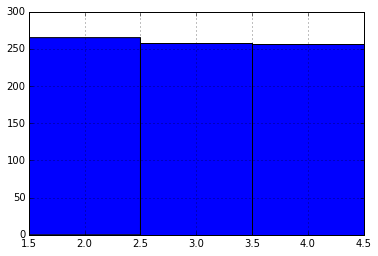

In [286]:
df.GPA.hist(bins=np.arange(1.5, 5))

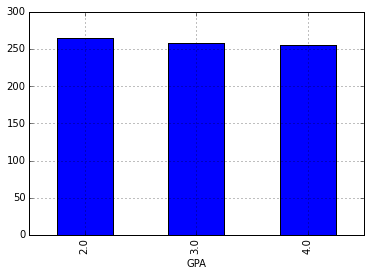

In [290]:
df.groupby('GPA').size().plot(kind='bar')

In [310]:
# Impute missing values
df = df.fillna(df.mean())
df.head()

,First_name,Last_name,State,Gender,Age,GPA,Days_missed,Graduated,is_graduated,is_female
ID,,,,,,,,,,
1,Wayne,Boyd,Florida,Male,19.000000,2.988447,9.000000,Yes,True,False
2,Ann,Matthews,Pennsylvania,Female,18.000000,3.000000,18.011139,Yes,True,True
3,George,Matthews,Texas,NaN,17.000000,2.988447,10.000000,Yes,True,False
4,Jerry,Ramos,California,Male,15.000000,2.000000,28.000000,No,False,False
5,Andrea,Carroll,North Carolina,Female,16.996109,2.000000,29.000000,No,False,True


In [291]:
for value, df0 in df.groupby('Graduated'):
    print 'Graduated:', value
    display(df0.head())

Graduated: No


,First_name,Last_name,State,Gender,Age,GPA,Days_missed,Graduated,is_graduated,is_female
ID,,,,,,,,,,
4,Jerry,Ramos,California,Male,15,2,28,No,False,False
5,Andrea,Carroll,North Carolina,Female,NaN,2,29,No,False,True
7,Stephanie,Barnes,Oklahoma,Female,NaN,3,20,No,False,True
9,Betty,Miller,NaN,NaN,17,3,23,No,False,False
12,Samuel,George,Georgia,Male,15,3,13,No,False,False


Graduated: Yes


,First_name,Last_name,State,Gender,Age,GPA,Days_missed,Graduated,is_graduated,is_female
ID,,,,,,,,,,
1,Wayne,Boyd,Florida,Male,19,NaN,9,Yes,True,False
2,Ann,Matthews,Pennsylvania,Female,18,3,NaN,Yes,True,True
3,George,Matthews,Texas,NaN,17,NaN,10,Yes,True,False
6,Annie,Fisher,Virginia,Female,19,NaN,5,Yes,True,True
8,Janet,Jenkins,Louisiana,Female,15,4,20,Yes,True,True


In [311]:
df = original_df.copy()
m = df.groupby('Graduated').mean()
m

,Age,GPA,Days_missed
Graduated,,,
No,17.051780,2.515971,19.228501
Yes,16.958874,3.505376,16.775561


In [312]:
# Class-conditional imputation
yes = df[df.Graduated == 'Yes'].fillna(df[df.Graduated == 'Yes'].mean())
no = df[df.Graduated == 'No'].fillna(df[df.Graduated == 'No'].mean())

In [313]:
pd.concat([no, yes]).sort().head()

,First_name,Last_name,State,Gender,Age,GPA,Days_missed,Graduated
ID,,,,,,,,
1,Wayne,Boyd,Florida,Male,19.00000,3.505376,9.000000,Yes
2,Ann,Matthews,Pennsylvania,Female,18.00000,3.000000,16.775561,Yes
3,George,Matthews,Texas,NaN,17.00000,3.505376,10.000000,Yes
4,Jerry,Ramos,California,Male,15.00000,2.000000,28.000000,No
5,Andrea,Carroll,North Carolina,Female,17.05178,2.000000,29.000000,No


In [314]:
df = original_df.copy()

# Class-conditional imputation (even better)
col = 'Graduated'
for v in df[col].unique():
    p = df[col] == v
    df.ix[p] = df[p].fillna(df[p].mean())
df.head(10)

,First_name,Last_name,State,Gender,Age,GPA,Days_missed,Graduated
ID,,,,,,,,
1,Wayne,Boyd,Florida,Male,19.00000,3.505376,9.000000,Yes
2,Ann,Matthews,Pennsylvania,Female,18.00000,3.000000,16.775561,Yes
3,George,Matthews,Texas,NaN,17.00000,3.505376,10.000000,Yes
4,Jerry,Ramos,California,Male,15.00000,2.000000,28.000000,No
5,Andrea,Carroll,North Carolina,Female,17.05178,2.000000,29.000000,No
6,Annie,Fisher,Virginia,Female,19.00000,3.505376,5.000000,Yes
7,Stephanie,Barnes,Oklahoma,Female,17.05178,3.000000,20.000000,No
8,Janet,Jenkins,Louisiana,Female,15.00000,4.000000,20.000000,Yes
9,Betty,Miller,NaN,NaN,17.00000,3.000000,23.000000,No
